# 把dPL模型中其他变量打印出来

## 导入依赖

In [97]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from datetime import datetime, timedelta

load_dotenv()
sys.path.append(os.getenv("PROJ_PATH"))  # type: ignore

from project.better_estimate import load_config  # noqa

## 设置模型配置

In [98]:
config = load_config(r"conf/config_dhbv_lstm.yaml")
out_path = config["out_path"]

## 加载数据

In [99]:
inner_evap = np.load(os.path.join(out_path, "AET_hydro.npy"))
inner_soilwater = np.load(os.path.join(out_path, "soilwater.npy"))
inner_swe = np.load(os.path.join(out_path, "SWE.npy"))
select_basins = json.load(open(os.path.join(os.getenv("DATA_PATH"), "531sub_id.txt"), 'r'))

## 加载ERA5L的数据

In [100]:
era5l_evap_df = pd.read_csv(
    os.path.join(
        os.getenv("DATA_PATH"),
        "era5l_data",
        "output_e_mm_1995-2010_monthly.csv",
    ),
    parse_dates=["time"],
    index_col="time",
)
era5l_soilwater_df = pd.read_csv(
    os.path.join(
        os.getenv("DATA_PATH"),
        "era5l_data",
        "output_soilwater_mm_1995-2010_monthly.csv",
    ),
    parse_dates=["time"],
    index_col="time",
)
era5l_swe_df = pd.read_csv(
    os.path.join(
        os.getenv("DATA_PATH"),
        "era5l_data",
        "output_sd_mm_1995-2010_monthly.csv",
    ),
    parse_dates=["time"],
    index_col="time",
)
era5l_cols = era5l_evap_df.columns[:]

## 将数据转换为月尺度

In [101]:
start_date = datetime(1995, 10, 1) + timedelta(days=365)
date_range = pd.date_range(
    start=start_date, periods=inner_evap.shape[0], freq="D"
)
inner_evap_df = pd.DataFrame(
    data=inner_evap.squeeze(),
    index=date_range,
    columns=select_basins,
).resample('MS').mean()
inner_soilwater_df = pd.DataFrame(
    data=inner_soilwater.squeeze(),
    index=date_range,
    columns=select_basins,
).resample('MS').mean()
inner_swe_df = pd.DataFrame(
    data=inner_swe.squeeze(),
    index=date_range,
    columns=select_basins,
).resample('MS').mean()

## 计算相关性

In [102]:
evap_corr = []
soilwater_corr = []
swe_corr = []
reference_index = inner_evap_df.index.to_list()
for i in range(len(select_basins)):
    basin_col_name = select_basins[i]
    for df1, df2, corr in zip(
        [inner_evap_df, inner_soilwater_df, inner_swe_df],
        [era5l_evap_df, era5l_soilwater_df, era5l_swe_df],
        [evap_corr, soilwater_corr, swe_corr],
    ):
        data_1 = df1.loc[:, basin_col_name].values
        data_2 = df2.loc[reference_index, str(basin_col_name)].values
        correlation_matrix = np.corrcoef(data_1, data_2)
        correlation_value = correlation_matrix[0, 1]
        corr.append(correlation_value)


e:\PaperCode\dpl-project\generic_deltamodel\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
e:\PaperCode\dpl-project\generic_deltamodel\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
e:\PaperCode\dpl-project\generic_deltamodel\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
e:\PaperCode\dpl-project\generic_deltamodel\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
e:\PaperCode\dpl-project\generic_deltamodel\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
e:\PaperCode\dpl-project\generic_deltamodel\.venv\Lib\site-packages\numpy\lib\_function_ba

In [103]:
evap_corr = np.array(evap_corr)
soilwater_corr = np.array(soilwater_corr)
swe_corr = np.array(swe_corr)
evap_corr = evap_corr[~np.isnan(evap_corr)]
soilwater_corr = soilwater_corr[~np.isnan(soilwater_corr)]
swe_corr = swe_corr[~np.isnan(swe_corr)]

C:\Users\OMEN\AppData\Local\Temp\ipykernel_10608\1185180575.py:22: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\OMEN\AppData\Local\Temp\ipykernel_10608\1185180575.py:22: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\OMEN\AppData\Local\Temp\ipykernel_10608\1185180575.py:22: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\OMEN\AppData\Local\Temp\ipykernel_10608\1185180575.py:22: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\OMEN\AppData\Local\Temp\ipykernel_10608\1185180575.py:22: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\OMEN\AppData\Local\Temp\ipykernel_10608\1185180575.py:22: UserWarning: Glyph 22270 (\N{CJK 

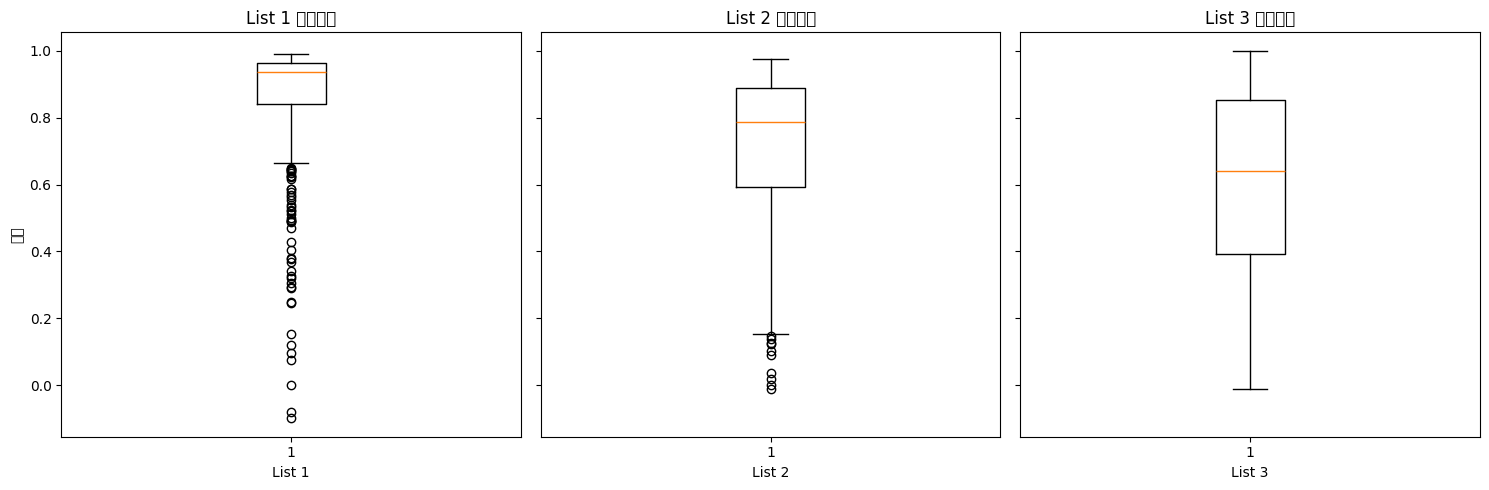

In [104]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# 子图1：绘制 list1
axes[0].boxplot(evap_corr)
axes[0].set_title('List 1 的箱线图')
axes[0].set_xlabel('List 1')
axes[0].set_ylabel('数值')

# 子图2：绘制 list2
axes[1].boxplot(soilwater_corr)
axes[1].set_title('List 2 的箱线图')
axes[1].set_xlabel('List 2')

# 子图3：绘制 list3
axes[2].boxplot(swe_corr)
axes[2].set_title('List 3 的箱线图')
axes[2].set_xlabel('List 3')

# --- 4. 调整布局并显示 ---
plt.tight_layout()
plt.show()